In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
df = pd.read_csv('../data/WHR2024.csv')

In [82]:
# Remove all rows where 'Country name' is 'Israel'
df = df[df['Country name'] != 'Israel']

print(df.head())
print(df.info())

  Country name  Ladder score  upperwhisker  lowerwhisker  \
0      Finland         7.741         7.815         7.667   
1      Denmark         7.583         7.665         7.500   
2      Iceland         7.525         7.618         7.433   
3       Sweden         7.344         7.422         7.267   
5  Netherlands         7.319         7.383         7.256   

   Explained by: Log GDP per capita  Explained by: Social support  \
0                             1.844                         1.572   
1                             1.908                         1.520   
2                             1.881                         1.617   
3                             1.878                         1.501   
5                             1.901                         1.462   

   Explained by: Healthy life expectancy  \
0                                  0.695   
1                                  0.699   
2                                  0.718   
3                                  0.724   
5   

In [86]:
# Create a mapping dictionary for countries and their regions
region_mapping = {
    # Europe
    'Finland': 'Europe', 'Denmark': 'Europe', 'Iceland': 'Europe', 'Sweden': 'Europe',
    'Netherlands': 'Europe', 'Norway': 'Europe', 'Luxembourg': 'Europe', 'Switzerland': 'Europe',
    'Austria': 'Europe', 'Belgium': 'Europe', 'Ireland': 'Europe', 'Czechia': 'Europe',
    'Lithuania': 'Europe', 'United Kingdom': 'Europe', 'Slovenia': 'Europe', 'France': 'Europe',
    'Kosovo': 'Europe', 'Romania': 'Europe', 'Estonia': 'Europe', 'Poland': 'Europe',
    'Spain': 'Europe', 'Serbia': 'Europe', 'Malta': 'Europe', 'Italy': 'Europe',
    'Slovakia': 'Europe', 'Latvia': 'Europe', 'Cyprus': 'Europe', 'Portugal': 'Europe',
    'Hungary': 'Europe', 'Croatia': 'Europe', 'Greece': 'Europe', 'Bosnia and Herzegovina': 'Europe',
    'Moldova': 'Europe', 'Montenegro': 'Europe', 'Bulgaria': 'Europe', 'North Macedonia': 'Europe',
    'Albania': 'Europe', 'Ukraine': 'Europe',

    # Middle East
    'Kuwait': 'Middle East', 'Saudi Arabia': 'Middle East',
    'United Arab Emirates': 'Middle East', 'Bahrain': 'Middle East', 'Iraq': 'Middle East',
    'Iran': 'Middle East', 'State of Palestine': 'Middle East', 'Jordan': 'Middle East',
    'Yemen': 'Middle East', 'Lebanon': 'Middle East',

    # Asia
    'Singapore': 'Asia', 'Taiwan Province of China': 'Asia', 'Uzbekistan': 'Asia',
    'Kazakhstan': 'Asia', 'Japan': 'Asia', 'South Korea': 'Asia', 'Philippines': 'Asia',
    'Vietnam': 'Asia', 'Thailand': 'Asia', 'Malaysia': 'Asia', 'China': 'Asia',
    'Kyrgyzstan': 'Asia', 'Mongolia': 'Asia', 'Armenia': 'Asia', 'Georgia': 'Asia',
    'Nepal': 'Asia', 'Laos': 'Asia', 'Azerbaijan': 'Asia', 'Pakistan': 'Asia',
    'Myanmar': 'Asia', 'Cambodia': 'Asia', 'India': 'Asia', 'Sri Lanka': 'Asia',
    'Bangladesh': 'Asia', 'Hong Kong S.A.R. of China': 'Asia', 'Tajikistan': 'Asia',
    'Indonesia': 'Asia',

    # Latin America
    'Costa Rica': 'Latin America', 'Mexico': 'Latin America', 'Uruguay': 'Latin America',
    'El Salvador': 'Latin America', 'Chile': 'Latin America', 'Panama': 'Latin America',
    'Guatemala': 'Latin America', 'Nicaragua': 'Latin America', 'Brazil': 'Latin America',
    'Argentina': 'Latin America', 'Paraguay': 'Latin America', 'Honduras': 'Latin America',
    'Jamaica': 'Latin America', 'Peru': 'Latin America', 'Dominican Republic': 'Latin America',
    'Bolivia': 'Latin America', 'Ecuador': 'Latin America', 'Colombia': 'Latin America',
    'Venezuela': 'Latin America',

    # Africa
    'Libya': 'Africa', 'Mauritius': 'Africa', 'South Africa': 'Africa',
    'Algeria': 'Africa', 'Congo (Brazzaville)': 'Africa', 'Mozambique': 'Africa',
    'Gabon': 'Africa', 'Ivory Coast': 'Africa', 'Guinea': 'Africa', 'Nigeria': 'Africa',
    'Cameroon': 'Africa', 'Namibia': 'Africa', 'Morocco': 'Africa', 'Niger': 'Africa',
    'Burkina Faso': 'Africa', 'Mauritania': 'Africa', 'Gambia': 'Africa', 'Chad': 'Africa',
    'Kenya': 'Africa', 'Tunisia': 'Africa', 'Benin': 'Africa', 'Uganda': 'Africa',
    'Ghana': 'Africa', 'Liberia': 'Africa', 'Mali': 'Africa', 'Madagascar': 'Africa',
    'Togo': 'Africa', 'Ethiopia': 'Africa', 'Tanzania': 'Africa', 'Comoros': 'Africa',
    'Zambia': 'Africa', 'Eswatini': 'Africa', 'Malawi': 'Africa', 'Botswana': 'Africa',
    'Zimbabwe': 'Africa', 'Congo (Kinshasa)': 'Africa', 'Sierra Leone': 'Africa',
    'Lesotho': 'Africa', 'Senegal': 'Africa', 'Egypt': 'Africa',

    # Oceania
    'Australia': 'Oceania', 'New Zealand': 'Oceania',

    # Mixed region
    'Russia': 'Europe/Asia', 'Turkiye': 'Europe/Asia'
}

# Add a new 'Region' column based on the mapping
df['Region'] = df['Country name'].map(region_mapping)

# Replace missing region values with 'Other'
df['Region'] = df['Region'].fillna('Other')

# Print the first rows of the dataframe to verify the new Region column
print(df[['Country name', 'Region']].head())


  Country name  Region
0      Finland  Europe
1      Denmark  Europe
2      Iceland  Europe
3       Sweden  Europe
5  Netherlands  Europe


In [98]:
# Compute mean happiness score by region
mean_scores = df.groupby('Region')['Ladder score'].mean().sort_values(ascending=False)
print(mean_scores)

Region
Oceania          7.043000
Europe           6.466026
Latin America    6.143368
Other            5.516250
Asia             5.412481
Europe/Asia      5.380000
Middle East      5.165900
Africa           4.399075
Name: Ladder score, dtype: float64


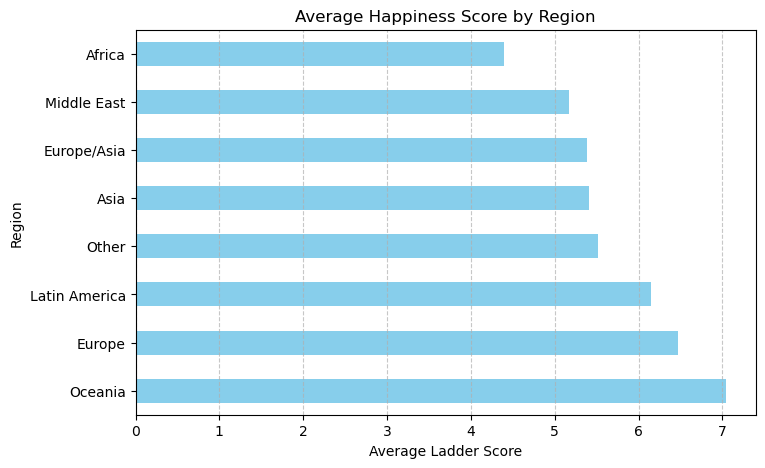

In [104]:
# Average Happiness Score by Region
mean_scores.plot(kind='barh', figsize=(8,5), color='skyblue')
plt.title('Average Happiness Score by Region')
plt.xlabel('Average Ladder Score')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [112]:
# Distribution of countries within each region
region_counts = df['Region'].value_counts()
print(region_counts)

Region
Africa           40
Europe           38
Asia             27
Latin America    19
Middle East      10
Other             4
Oceania           2
Europe/Asia       2
Name: count, dtype: int64


In [108]:
# Top country in each region
top_countries = df.loc[df.groupby('Region')['Ladder score'].idxmax()][['Region', 'Country name', 'Ladder score']]
print("Top countries by region:\n", top_countries)

Top countries by region:
            Region Country name  Ladder score
65         Africa        Libya         5.866
29           Asia    Singapore         6.523
0          Europe      Finland         7.741
71    Europe/Asia       Russia         5.785
11  Latin America   Costa Rica         6.955
12    Middle East       Kuwait         6.951
9         Oceania    Australia         7.057
14          Other       Canada         6.900


In [110]:
# Bottom country in each region
bottom_countries = df.loc[df.groupby('Region')['Ladder score'].idxmin()][['Region', 'Country name', 'Ladder score']]
print("\nBottom countries by region:\n", bottom_countries)


Bottom countries by region:
             Region Country name  Ladder score
140         Africa      Lesotho         3.186
128           Asia   Bangladesh         3.886
104         Europe      Ukraine         4.873
97     Europe/Asia      Turkiye         4.975
78   Latin America    Venezuela         5.607
141    Middle East      Lebanon         2.707
10         Oceania  New Zealand         7.029
142          Other  Afghanistan         1.721


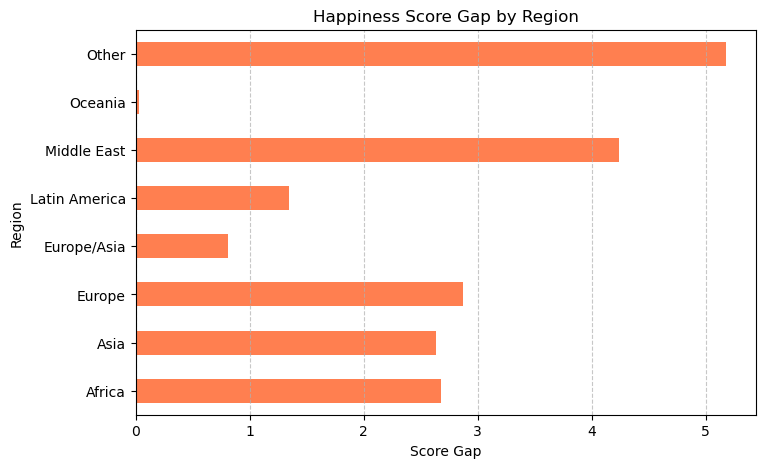

Happiness Score Gaps by Region:
                  max    min    Gap
Region                            
Africa         5.866  3.186  2.680
Asia           6.523  3.886  2.637
Europe         7.741  4.873  2.868
Europe/Asia    5.785  4.975  0.810
Latin America  6.955  5.607  1.348
Middle East    6.951  2.707  4.244
Oceania        7.057  7.029  0.028
Other          6.900  1.721  5.179


In [120]:
# The gap between the highest and lowest happiness scores in each region is calculated
happiness_gap = df.groupby('Region')['Ladder score'].agg(['max', 'min'])
happiness_gap['Gap'] = happiness_gap['max'] - happiness_gap['min']

# The happiness score gap by region is plotted
happiness_gap['Gap'].plot(kind='barh', figsize=(8, 5), color='coral')
plt.title('Happiness Score Gap by Region')
plt.xlabel('Score Gap')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

print("Happiness Score Gaps by Region:\n", happiness_gap)

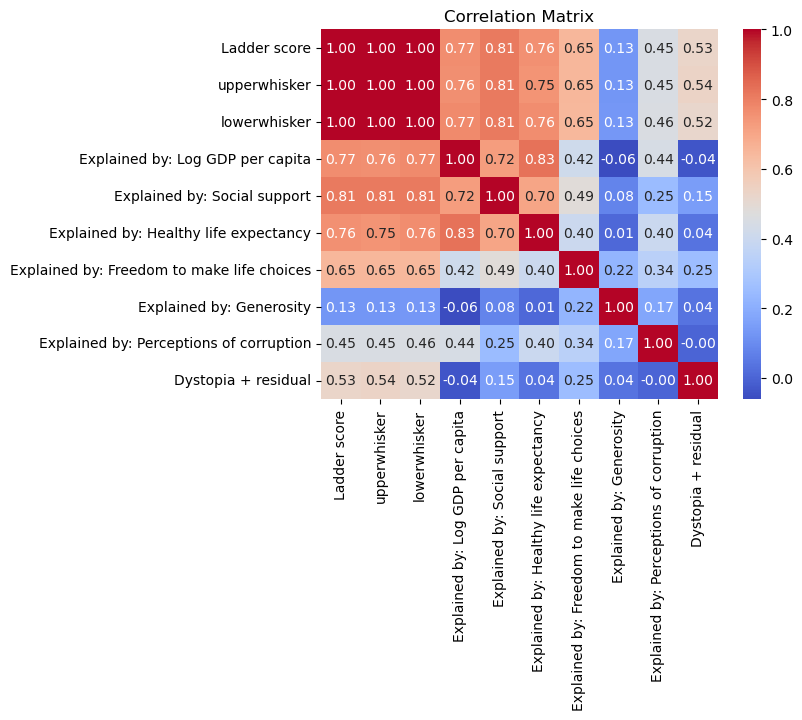

In [118]:
# Heatmap of the correlation between variables
corr = df.select_dtypes(include='float64').corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

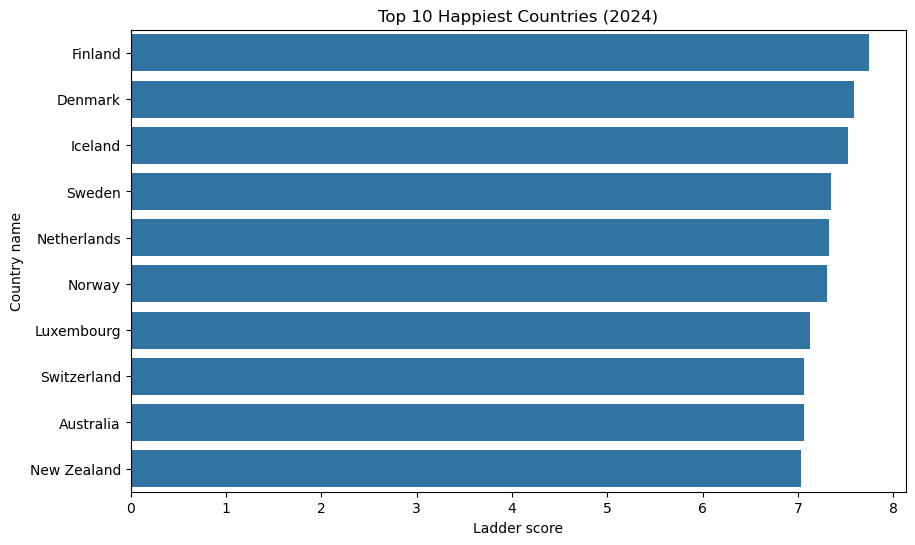

In [88]:
# Top 10 Happiest Countries (2024)
top10 = df.nlargest(10, 'Ladder score')
plt.figure(figsize=(10,6))
sns.barplot(x='Ladder score', y='Country name', data=top10)

plt.title('Top 10 Happiest Countries (2024)')
plt.show()

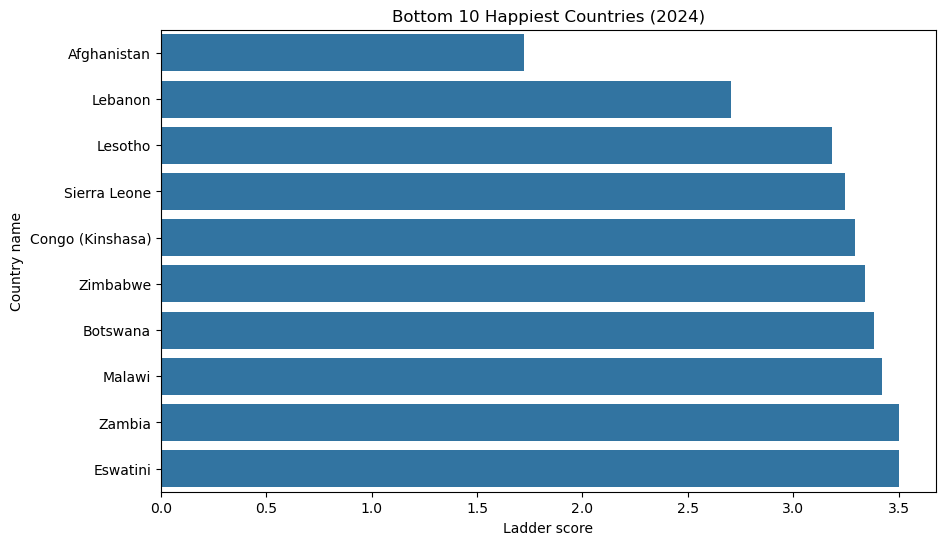

In [90]:
# Bottom 10 Happiest Countries (2024)
bottom10 = df.nsmallest(10, 'Ladder score')
plt.figure(figsize=(10,6))
sns.barplot(x='Ladder score', y='Country name', data=bottom10)

plt.title('Bottom 10 Happiest Countries (2024)')
plt.show()

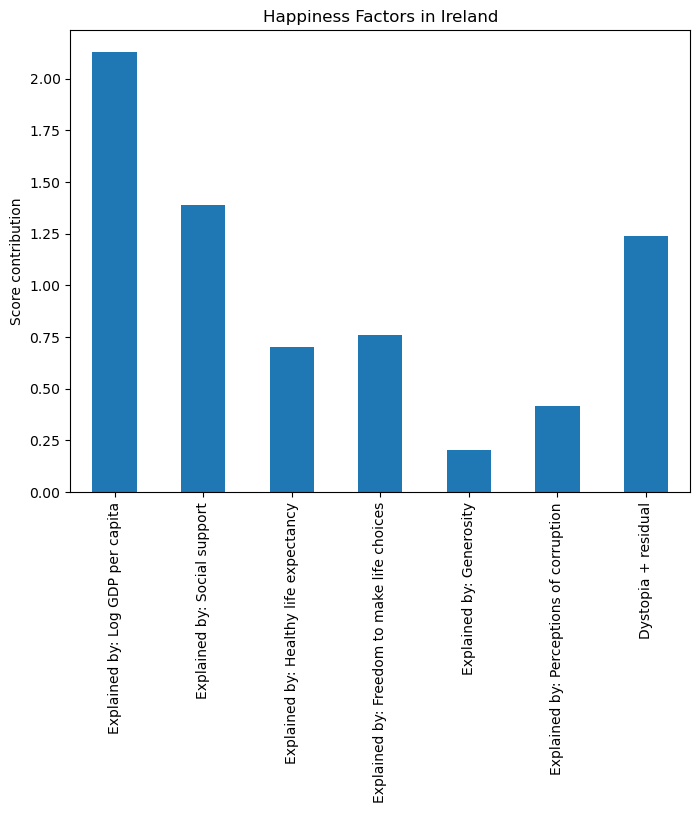

In [92]:
# Factor Contribution Analysis
country = 'Ireland'
df_country = df[df['Country name'] == country]
df_country_factors = df_country[['Explained by: Log GDP per capita',
                                 'Explained by: Social support',
                                 'Explained by: Healthy life expectancy',
                                 'Explained by: Freedom to make life choices',
                                 'Explained by: Generosity',
                                 'Explained by: Perceptions of corruption',
                                 'Dystopia + residual']].T
df_country_factors.columns = ['Score']

df_country_factors.plot(kind='bar', legend=False, figsize=(8,6))
plt.title(f'Happiness Factors in {country}')
plt.ylabel('Score contribution')
plt.show()


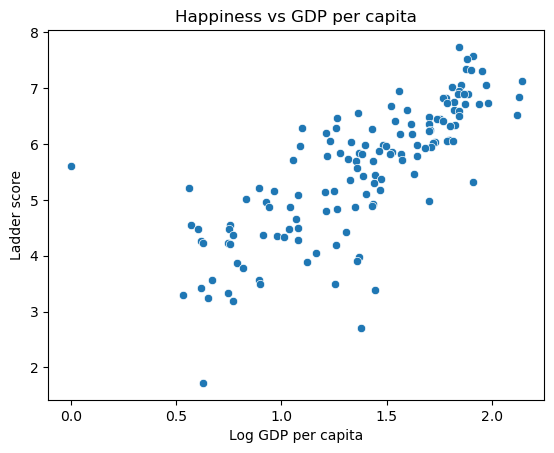

In [94]:
# Relationship between happiness and Income
sns.scatterplot(x='Explained by: Log GDP per capita', y='Ladder score', data=df)
plt.title('Happiness vs GDP per capita')
plt.xlabel('Log GDP per capita')
plt.ylabel('Ladder score')
plt.show()


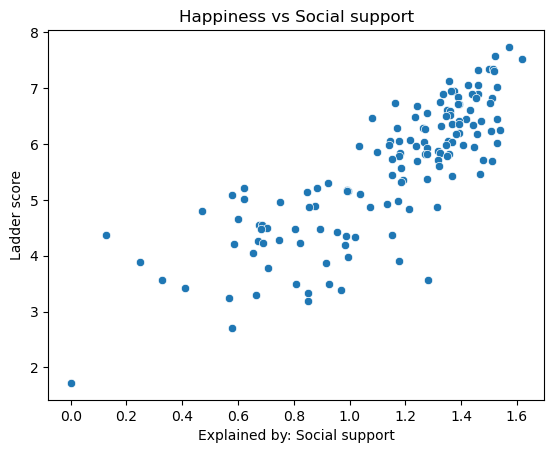

In [74]:
# The effect of social support on happiness (Happiness vs Social Support)
sns.scatterplot(x='Explained by: Social support', y='Ladder score', data=df)
plt.title('Happiness vs Social support')
plt.show()


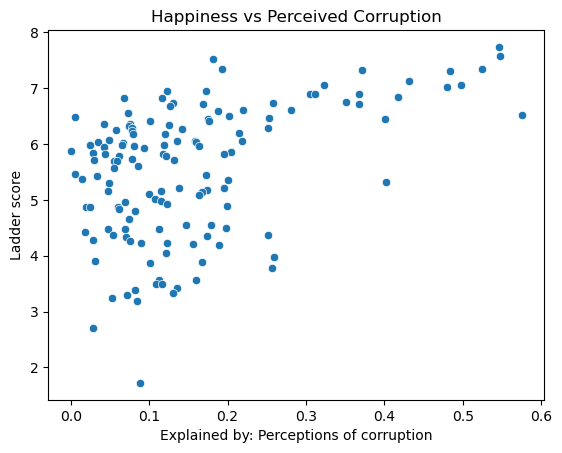

In [76]:
# The effect of perceived corruption on happiness (Happiness vs Perceived Corruption)
sns.scatterplot(x='Explained by: Perceptions of corruption', y='Ladder score', data=df)
plt.title('Happiness vs Perceived Corruption')
plt.show()

In [130]:
# The categories and their labels are defined
bins = [0, 4, 5.5, 7.5, 10]
labels = ['Low happiness', 'Medium happiness', 'High happiness', 'Very high happiness']

# A 'Happiness level' column is created based on the happiness score
df['Happiness level'] = pd.cut(df['Ladder score'], bins=bins, labels=labels)

# All countries along with their happiness scores and levels are printed
print(df[['Country name', 'Ladder score', 'Happiness level']])

         Country name  Ladder score      Happiness level
0             Finland         7.741  Very high happiness
1             Denmark         7.583  Very high happiness
2             Iceland         7.525  Very high happiness
3              Sweden         7.344       High happiness
5         Netherlands         7.319       High happiness
..                ...           ...                  ...
138  Congo (Kinshasa)         3.295        Low happiness
139      Sierra Leone         3.245        Low happiness
140           Lesotho         3.186        Low happiness
141           Lebanon         2.707        Low happiness
142       Afghanistan         1.721        Low happiness

[142 rows x 3 columns]
